<a href="https://colab.research.google.com/github/Donalizasaji/LAB1ML/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder


In [11]:
df=pd.read_csv('/content/drive/MyDrive/customer_support_tickets.csv')

In [12]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [13]:
df.shape

(8469, 17)

BINNING

In [14]:
bin_edges = [0, 18, 35, 45, 100]
bin_labels = ['Teenager', 'Young Adult', 'Adult', 'Senior']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bin_edges, labels=bin_labels)


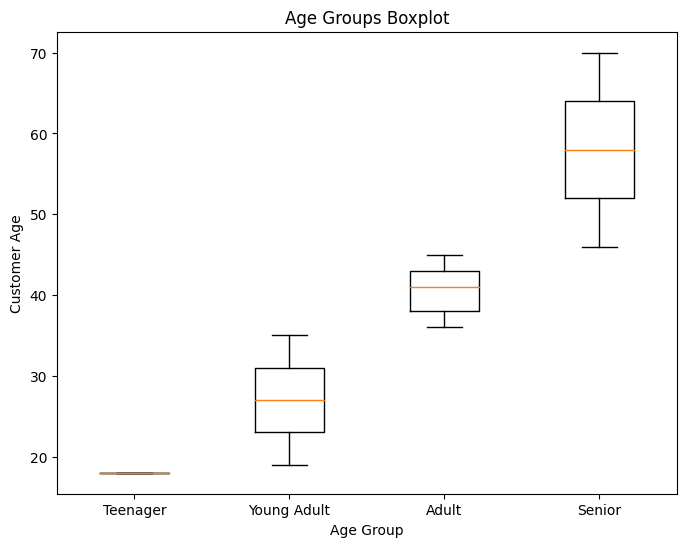

In [15]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    [df[df['Age Group'] == label]['Customer Age'] for label in bin_labels],
    labels=bin_labels
)
plt.title('Age Groups Boxplot')
plt.xlabel('Age Group')
plt.ylabel('Customer Age')
plt.show()

DISTRIBUTION OF CUSTOMERS ACROSS THEIR AGE GROUPS

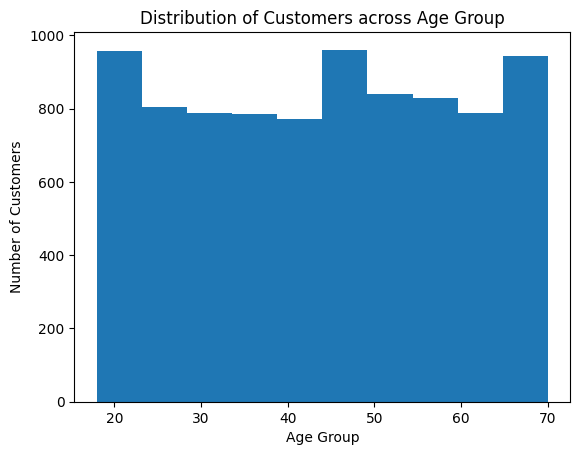

In [16]:
plt.hist(df['Customer Age'], bins=10)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers across Age Group')
plt.show()

CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA

In [22]:
label_encoder = LabelEncoder()


df['Customer Age Encoded'] = label_encoder.fit_transform(df['Customer Age'])
df['Product Purchased Encoded'] = label_encoder.fit_transform(df['Product Purchased'])

In [23]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Age Group,Age Group Encoded,Customer Age Encoded,Product Purchased Encoded,Customer Age Numerical,Product Purchased Numerical
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,Social media,2023-06-01 12:15:36,NaN,NaN,Young Adult,3,14,16,14,16
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,Chat,2023-06-01 16:45:38,NaN,NaN,Adult,0,24,21,24,21
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,Senior,1,30,10,30,10
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,Young Adult,3,9,25,9,25
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,Senior,1,49,5,49,5


ONE-HOT ENCODING

In [24]:
Customer_Age_dummies = pd.get_dummies(df['Customer Age'], prefix='Customer Age')
Product_Purchased_dummies = pd.get_dummies(df['Product Purchased'], prefix='Product Purchased')


encoded_df = pd.concat([Customer_Age_dummies, Product_Purchased_dummies], axis=1)

print(encoded_df)

      Customer Age_18  Customer Age_19  Customer Age_20  Customer Age_21  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   
...               ...              ...              ...              ...   
8464                0                0                0                0   
8465                0                0                0                0   
8466                0                0                0                0   
8467                0                0                0                0   
8468                0                0                0                0   

      Customer Age_22  Customer Age_23  Customer Age_24  Customer Age_25  \
0          

COVARIANCE MATRIX - RELATIONSHIP BETWEEN CUSTOMER AGE AND SATISFACTION RATING

Covariance Matrix:
[[222.1489899    1.60909091]
 [  1.60909091   2.10868687]]


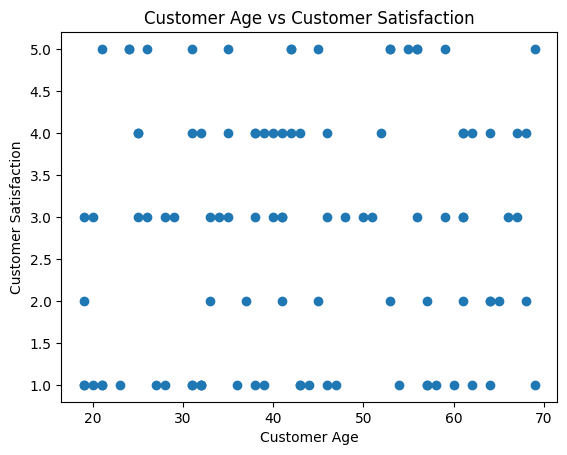

In [26]:
np.random.seed(42)
n_samples = 100
customer_age = np.random.randint(18, 70, size=n_samples)
customer_satisfaction = np.random.randint(1, 6, size=n_samples)
data = pd.DataFrame({'CustomerAge': customer_age, 'CustomerSatisfaction': customer_satisfaction})
cov_matrix = np.cov(data['CustomerAge'], data['CustomerSatisfaction'])
print("Covariance Matrix:")
print(cov_matrix)
plt.scatter(data['CustomerAge'], data['CustomerSatisfaction'])
plt.xlabel('Customer Age')
plt.ylabel('Customer Satisfaction')
plt.title('Customer Age vs Customer Satisfaction')
plt.show()

Covariance Matrix:
[[222.1489899    1.60909091]
 [  1.60909091   2.10868687]]


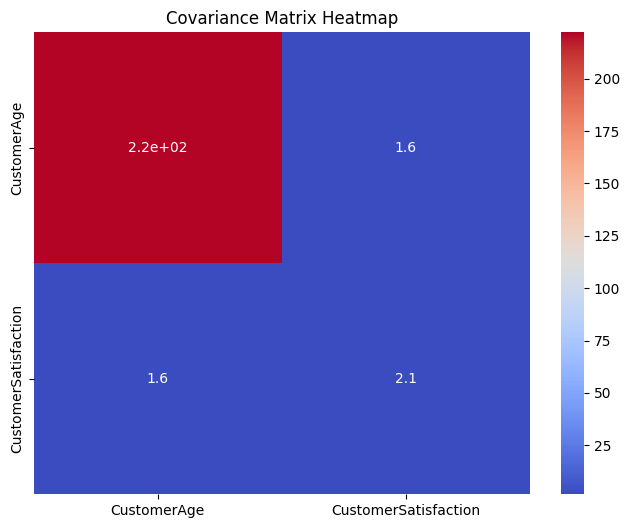

In [29]:
np.random.seed(42)
n_samples = 100
customer_age = np.random.randint(18, 70, size=n_samples)
customer_satisfaction = np.random.randint(1, 6, size=n_samples)
data = pd.DataFrame({'CustomerAge': customer_age, 'CustomerSatisfaction': customer_satisfaction})
cov_matrix = np.cov(data['CustomerAge'], data['CustomerSatisfaction'])
print("Covariance Matrix:")
print(cov_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=data.columns, yticklabels=data.columns)
plt.title('Covariance Matrix Heatmap')
plt.show()

CHI-SQUARE TEST TO FIND THE ASSOCIATION BETWEEN CUSTOMER GENDER AND PRODUCT PURCHASED

In [42]:
from scipy.stats import chi2_contingency
np.random.seed(42)
n_samples = 200
customer_gender = np.random.choice(['Male', 'Female'], size=n_samples)
product_purchased= np.random.choice(['Yes', 'No'], size=n_samples)
data = pd.DataFrame({'CustomerGender': customer_gender, 'ProductPurchased': product_purchased})
contingency_table = pd.crosstab(data['CustomerGender'], data['ProductPurchased'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Squared:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

if p < 0.05:
    print("There is a significant association between Customer Gender and Product Purchased.")
else:
    print("There is no significant association between Customer Gender and Product Purchased.")

Chi-Squared: 0.08000800080008001
p-value: 0.7772865686501679
Degrees of Freedom: 1
Expected Frequencies:
[[50.5 49.5]
 [50.5 49.5]]
There is no significant association between Customer Gender and Product Purchased.


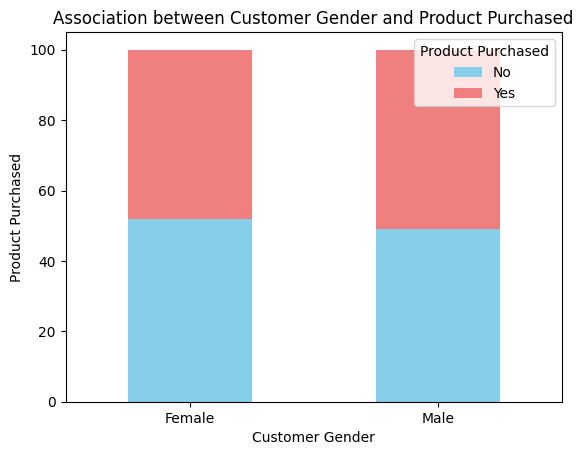

In [45]:

np.random.seed(42)
n_samples = 200
customer_gender = np.random.choice(['Male', 'Female'], size=n_samples)
product_purchased = np.random.choice(['Yes', 'No'], size=n_samples)
data = pd.DataFrame({'CustomerGender': customer_gender, 'ProductPurchased': product_purchased})
contingency_table = pd.crosstab(data['CustomerGender'], data['ProductPurchased'])
colors = ['skyblue', 'lightcoral']
contingency_table.plot(kind='bar', stacked=True, color=colors)
plt.title('Association between Customer Gender and Product Purchased')
plt.xlabel('Customer Gender')
plt.ylabel('Product Purchased')
plt.xticks(rotation=0)
plt.legend(title='Product Purchased')
plt.show()


COMPARE THE CUSTOMER SATISFACTION RATINGS WITH WHO PURCHASED AND WHO DID'NT

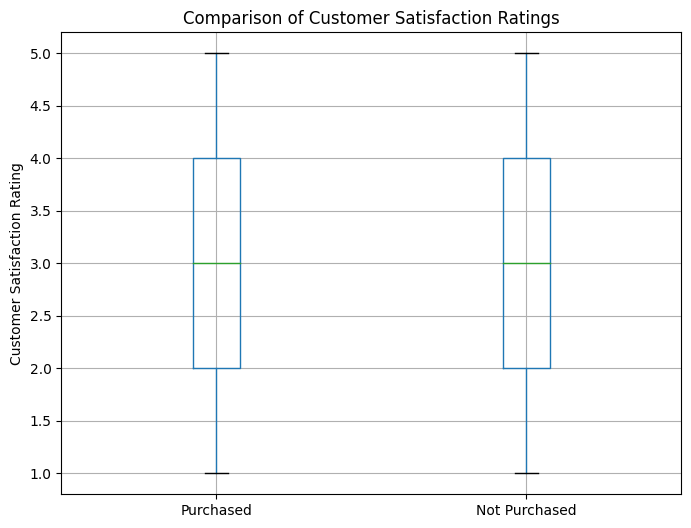

In [52]:

np.random.seed(42)
n_samples = 200
customer_satisfaction_purchased = np.random.randint(1, 6, size=n_samples)
customer_satisfaction_not_purchased = np.random.randint(1, 6, size=n_samples)
data = pd.DataFrame({
    'Satisfaction_Purchased': customer_satisfaction_purchased,
    'Satisfaction_Not_Purchased': customer_satisfaction_not_purchased
})

# Create box plots
plt.figure(figsize=(8, 6))
data.boxplot(column=['Satisfaction_Purchased', 'Satisfaction_Not_Purchased'])
plt.title('Comparison of Customer Satisfaction Ratings')
plt.ylabel('Customer Satisfaction Rating')
plt.xticks([1, 2], ['Purchased', 'Not Purchased'])
plt.show()

INDEPENDENT T-TEST

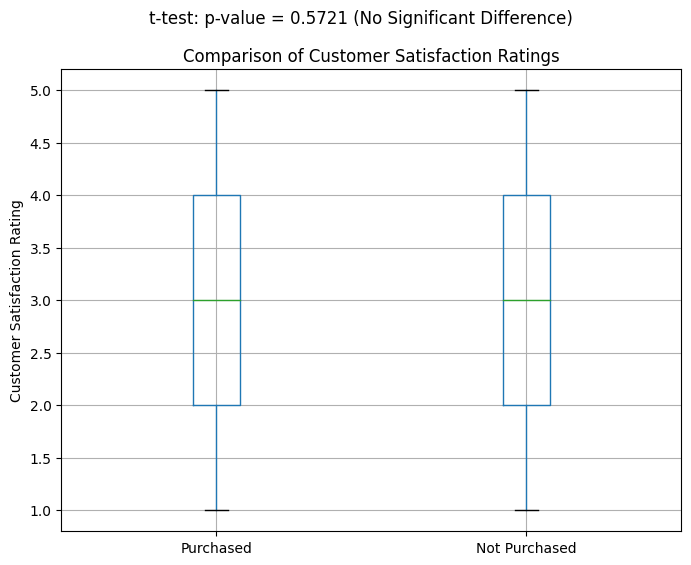

In [53]:
from scipy.stats import ttest_ind
_t_stat, p_value = ttest_ind(data['Satisfaction_Purchased'], data['Satisfaction_Not_Purchased'])

# Create box plots
plt.figure(figsize=(8, 6))
data.boxplot(column=['Satisfaction_Purchased', 'Satisfaction_Not_Purchased'])
plt.title('Comparison of Customer Satisfaction Ratings')
plt.ylabel('Customer Satisfaction Rating')
plt.xticks([1, 2], ['Purchased', 'Not Purchased'])

# Display t-test results
if p_value < 0.05:
    plt.suptitle(f"t-test: p-value = {p_value:.4f} (Significant Difference)")
else:
    plt.suptitle(f"t-test: p-value = {p_value:.4f} (No Significant Difference)")

plt.show()